<p style="text-align:center;"><span style="font-size:80px;"><span style="color:navy"><span style="font-family:cursive;"><span style="font-weight:bolder">Hi Everybody 👋</span></span></span></span></p>

# <p style="padding:15px;background-color:#0266b7 ;margin:0;color:#ffffff;font-family:Chalkduster;font-size:100%;text-align:center;border-radius: 25px 75px;overflow:hidden;font-weight:500">Table of Contents 📃</p>

<a id="contents_tabel"></a>    
<div style="border-radius:20px; padding: 15px; background-color: #e4ffdb; font-size:130%; text-align:left">

<h2 align="left"><font color=#ff6200>Table of Contents:</font></h2>
    
 * #### [Step 1 | Nessesary Libraries](#setup)
    - ##### [1.1 | Import Libraries](#import)
    - ##### [1.2 | Library configurations](#lib_config)
 * #### [Step 2 | Data and Preprocessing](#data)
    - ##### [2.1 | Load data & Information](#load_data)
    - ##### [2.2 | Describe Columns](#col_desc)
 * #### [Step 3 | Preprocessing](#preprocessing)
    - ##### [3.1 | Handle CCAvg](#ccavg)
    - ##### [3.2 | Null Values](#null)
    - ##### [3.3 | Plots & Outliers](#plots)
    - ##### [3.4 | Handle ZIP Code](#zipcode)
    - ##### [3.5 | normalization](#normalization
 * #### [Step 4 | Modeling](#modeling)
    - ##### [4.1 | Prerequisites](#prerequisites)
    - ##### [4.2 | KNN](#knn)
    - ##### [4.3 | Evaluations](#eval)

<a id="setup"></a>
# <p style="padding:15px;background-color:#0266b7 ;margin:0;color:#ffffff;font-family:Chalkduster;font-size:100%;text-align:center;border-radius: 25px 75px;overflow:hidden;font-weight:500">Step 1 | Nessasary Libraries 📚</p>

<a id="import"></a>
# <b><span style="color:#0266b7">Step 1.1 | </span><span style="color:#ff6200">Import Libraries</span></b>

In [1]:
import pandas as pd              # Pandas
import matplotlib.pyplot as plt  # Matplotlib
import seaborn as sns            # Seaborn
import warnings                  # Warnings
import numpy as np               # Numpy
import zipcodes as zcode         # Zipcodes
import folium                    # Folium

################### Sklearn ####################################
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report

<a id="lib_config"></a>
# <b><span style="color:#0266b7">Step 1.2 | </span><span style="color:#ff6200">Library configurations</span></b>

In [2]:
pd.options.mode.copy_on_write = True
sns.set_style('darkgrid')
warnings.filterwarnings('ignore')

<a id="data"></a>
# <p style="padding:15px;background-color:#0266b7 ;margin:0;color:#ffffff;font-family:Chalkduster;font-size:100%;text-align:center;border-radius: 25px 75px;overflow:hidden;font-weight:500">Step 2 |  Data 📥</p>

<a id="load_data"></a>
# <b><span style="color:#0266b7">Step 2.1 | </span><span style="color:#ff6200">Load Data & Information</span></b>

In [3]:
# Reading data form csv file
data = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
data

ID  Age  Experience  Income  ZIP Code  Family CCAvg  Education  \
0        1   25           1      49     91107       4  1/60          1   
1        2   45          19      34     90089       3  1/50          1   
2        3   39          15      11     94720       1  1/00          1   
3        4   35           9     100     94112       1  2/70          2   
4        5   35           8      45     91330       4  1/00          2   
...    ...  ...         ...     ...       ...     ...   ...        ...   
4995  4996   29           3      40     92697       1  1/90          3   
4996  4997   30           4      15     92037       4  0/40          1   
4997  4998   63          39      24     93023       2  0/30          3   
4998  4999   65          40      49     90034       3  0/50          2   
4999  5000   28           4      83     92612       3  0/80          1   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
0            0              0                   1           0       0   
1            0              0                   1           0       0   
2            0              0                   0           0       0   
3            0              0                   0           0       0   
4            0              0                   0           0       0   
...        ...            ...                 ...         ...     ...   
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
0              0  
1              0  
2              0  
3              0  
4              1  
...          ...  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1  

[5000 rows x 14 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  5000 non-null   int64 
 1   Age                 5000 non-null   int64 
 2   Experience          5000 non-null   int64 
 3   Income              5000 non-null   int64 
 4   ZIP Code            5000 non-null   int64 
 5   Family              5000 non-null   int64 
 6   CCAvg               5000 non-null   object
 7   Education           5000 non-null   int64 
 8   Mortgage            5000 non-null   int64 
 9   Personal Loan       5000 non-null   int64 
 10  Securities Account  5000 non-null   int64 
 11  CD Account          5000 non-null   int64 
 12  Online              5000 non-null   int64 
 13  CreditCard          5000 non-null   int64 
dtypes: int64(13), object(1)
memory usage: 547.0+ KB


In [5]:
data.describe(include='all')

ID          Age   Experience       Income      ZIP Code  \
count   5000.000000  5000.000000  5000.000000  5000.000000   5000.000000   
unique          NaN          NaN          NaN          NaN           NaN   
top             NaN          NaN          NaN          NaN           NaN   
freq            NaN          NaN          NaN          NaN           NaN   
mean    2500.500000    45.338400    20.104600    73.774200  93152.503000   
std     1443.520003    11.463166    11.467954    46.033729   2121.852197   
min        1.000000    23.000000    -3.000000     8.000000   9307.000000   
25%     1250.750000    35.000000    10.000000    39.000000  91911.000000   
50%     2500.500000    45.000000    20.000000    64.000000  93437.000000   
75%     3750.250000    55.000000    30.000000    98.000000  94608.000000   
max     5000.000000    67.000000    43.000000   224.000000  96651.000000   

             Family CCAvg    Education     Mortgage  Personal Loan  \
count   5000.000000  5000  5000.000000  5000.000000    5000.000000   
unique          NaN   108          NaN          NaN            NaN   
top             NaN  0/30          NaN          NaN            NaN   
freq            NaN   241          NaN          NaN            NaN   
mean       2.396400   NaN     1.881000    56.498800       0.096000   
std        1.147663   NaN     0.839869   101.713802       0.294621   
min        1.000000   NaN     1.000000     0.000000       0.000000   
25%        1.000000   NaN     1.000000     0.000000       0.000000   
50%        2.000000   NaN     2.000000     0.000000       0.000000   
75%        3.000000   NaN     3.000000   101.000000       0.000000   
max        4.000000   NaN     3.000000   635.000000       1.000000   

        Securities Account  CD Account       Online   CreditCard  
count          5000.000000  5000.00000  5000.000000  5000.000000  
unique                 NaN         NaN          NaN          NaN  
top                    NaN         NaN          NaN          NaN  
freq                   NaN         NaN          NaN          NaN  
mean              0.104400     0.06040     0.596800     0.294000  
std               0.305809     0.23825     0.490589     0.455637  
min               0.000000     0.00000     0.000000     0.000000  
25%               0.000000     0.00000     0.000000     0.000000  
50%               0.000000     0.00000     1.000000     0.000000  
75%               0.000000     0.00000     1.000000     1.000000  
max               1.000000     1.00000     1.000000     1.000000

<a id="col_desc"></a>
# <b><span style="color:#0266b7">Step 2.2 | </span><span style="color:#ff6200">Describe Columns</span></b>

<b><span style="color:#0266b7; font-weight:bold; font-size:25px">Information about columns :</span></b>
 - ##### ID : Customer ID.
 - ##### Age : Customer's age in complete years.
 - ##### Experience : Years of professional experience.
 - ##### Income : Annual income of customer.
 - ##### ZIP CODE : Home adddress ZIP Code.
 - ##### Family : Family size of the customer.
 - ##### CCAvg : Avg. spending on credit cards per month.
 - ##### Education : Education level :  
   - ###### Undergrade = 1  
   - ###### Graduate = 2  
   - ###### Advanced/Professional = 3  
 - ##### Mortgage : Value of house mortgage.
 - ##### Personal_loan : Did this customer accept the personal loan offer in last campaign?
 - ##### Securities_account : Does the customer have a securities account with the bank?
 - ##### Cd_account : Does the customer have a certificate of deposit(CD) account with the bank ?
 - ##### Online : Does the customer use internet banking facilities?
 - ##### Creditcard : Does the custimer use a credit card issued by universal bank?

<a id="preprocessing"></a>
# <p style="padding:15px;background-color:#0266b7 ;margin:0;color:#ffffff;font-family:Chalkduster;font-size:100%;text-align:center;border-radius: 25px 75px;overflow:hidden;font-weight:500">Step 3 | Preprocessing 🧮📊🔍</p>

<a id="ccavg"></a>
# <b><span style="color:#0266b7">Step 3.1 | </span><span style="color:#ff6200">Handle CCAvg</span></b>

### <b><span style="color:#0266b7">To Do :</span>
##### <b><span> 1) In DataFrame, Use "/" instead of "." for decimal point.</span>
##### <b><span> 2) CCAvg is a Integer variable, but in data, it's string.</span>


In [6]:
# CCAvg
# change and replace '/' with '.'
CCAvg = data.CCAvg.str.replace('/', '.')

# Change type to float
CCAvg = pd.to_numeric(CCAvg)

# # CCAvg times 12 to calculate Avg. spending on credit cards per Year
# CCAvg = CCAvg * 12
CCAvg

0       1.6
1       1.5
2       1.0
3       2.7
4       1.0
       ... 
4995    1.9
4996    0.4
4997    0.3
4998    0.5
4999    0.8
Name: CCAvg, Length: 5000, dtype: float64

In [7]:
# remove old CCAvg and insert new CCAvg column to DataFrame
data.drop(columns='CCAvg', inplace=True)
data.insert(6, 'CCAvg', CCAvg)

<a id="null"></a>
# <b><span style="color:#0266b7">Step 3.2 | </span><span style="color:#ff6200">Null Values</span></b>

In [8]:
data.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

<div class="alert alert-success" role="alert">
    <b>There is no Null (NaN) values.</b>
</div>

<a id="plots"></a>
# <b><span style="color:#0266b7">Step 3.3 | </span><span style="color:#ff6200">Plots & Outliers</span></b>

<div class="alert alert-warning" role="alert">
    <p><b><span style="font-size:25px"> Col 1 : ID</span></b></p>
    <b>we do not need this column to prediction.</b>
</div>

In [9]:
# Delete ID
data.drop(columns='ID', inplace=True)

<div class="alert alert-warning" role="alert">
    <p><b><span style="font-size:25px"> Col 2 : Age</span></b></p>
</div>

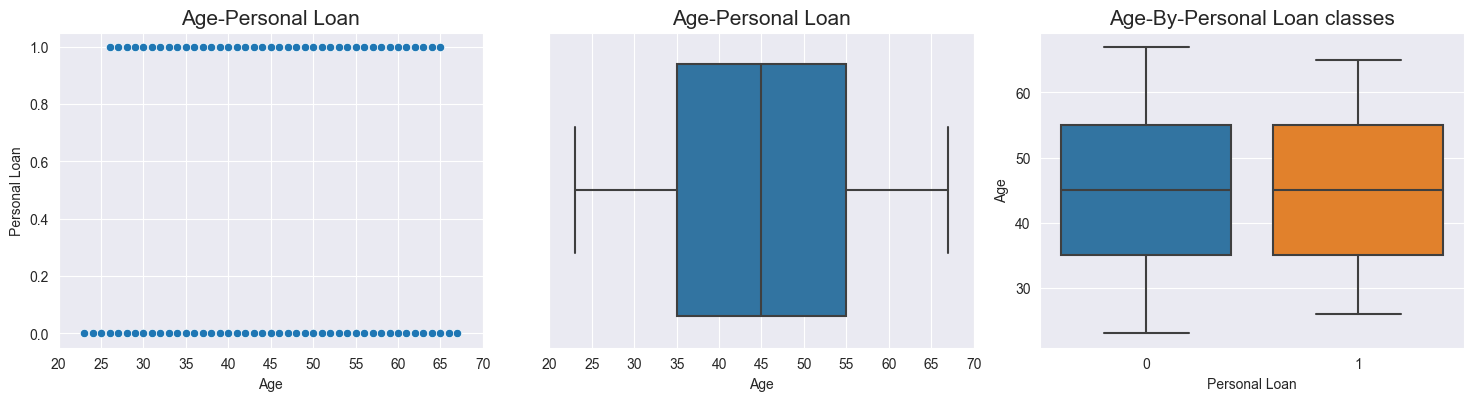

In [10]:
x='Age'
y='Personal Loan'
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))
fig.tight_layout(pad=2.0)

# ax1
sns.scatterplot(ax=ax1, x=x, y=y, data=data)
ax1.set(xticks=range(20, 75, 5))
ax1.set_title(x+'-'+y, fontsize=15)

#ax2
sns.boxplot(ax=ax2, x=x, data=data)
ax2.set(xticks=range(20, 75, 5))
ax2.set_title(x+'-'+y, fontsize=15)

# ax3
sns.boxplot(ax=ax3, x=y, y=x, data=data)
ax3.set_title(x+'-By-'+y+' classes', fontsize=15)

plt.show()

<div class="alert alert-success" role="alert">
    <p><b>There is no outlier.</b></p>
    <p><b>Age has Normal Distribution.</b></p>
    <p><b>Age is in [23, 67]</b></p> 
</div>

<div class="alert alert-warning" role="alert">
    <p><b><span style="font-size:25px"> Col 3 : Experience</span></b></p>
</div>

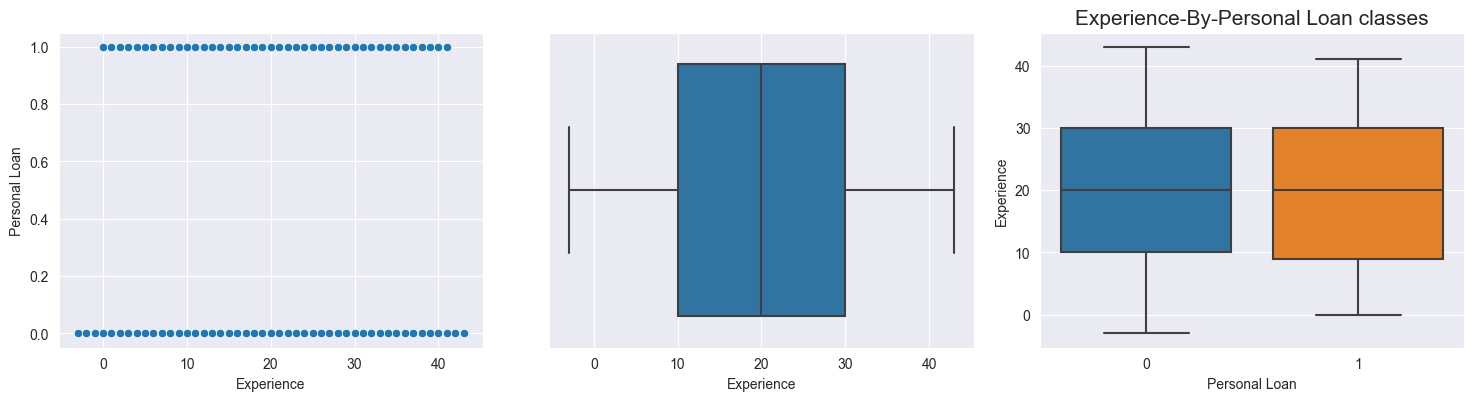

In [11]:
x='Experience'
y='Personal Loan'
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))
fig.tight_layout(pad=2.0)

# ax1
sns.scatterplot(ax=ax1, x=x, y=y, data=data)

#ax2
sns.boxplot(ax=ax2, x=x, data=data)

# ax3
sns.boxplot(ax=ax3, x=y, y=x, data=data).set(title='Age-By target classes')
ax3.set_title(x+'-By-'+y+' classes', fontsize=15)
plt.show()

<div class="alert alert-danger" role="alert">
    <p><b><span style="font-size:15px">Experience can not be minus(exp>=0)</span></b></p>
</div>

In [12]:
data.Experience = abs(data.Experience)

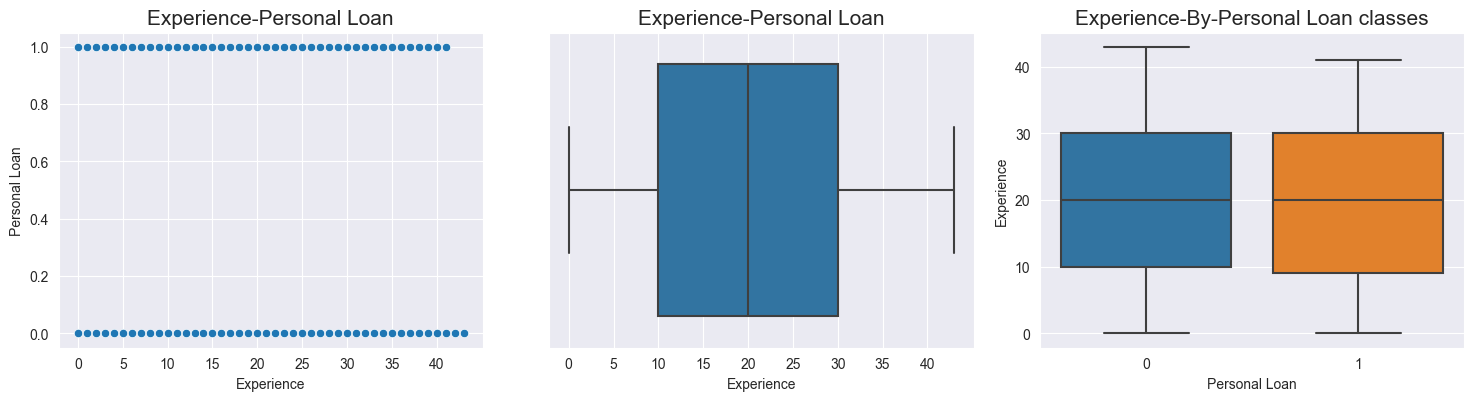

In [13]:
x='Experience'
y='Personal Loan'
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))
fig.tight_layout(pad=2.0)

# ax1
sns.scatterplot(ax=ax1, x=x, y=y, data=data)
ax1.set(xticks=range(0, 45, 5))
ax1.set_title(x+'-'+y, fontsize=15)

#ax2
sns.boxplot(ax=ax2, x=x, data=data)
ax2.set(xticks=range(0, 45, 5))
ax2.set_title(x+'-'+y, fontsize=15)

# ax3
sns.boxplot(ax=ax3, x=y, y=x, data=data).set(title='Age-By target classes')
ax3.set_title(x+'-By-'+y+' classes', fontsize=15)
plt.show()

<div class="alert alert-success" role="alert">
    <p><b>There is no outlier.</b></p>
    <p><b>Experience has Normal Distribution.</b></p>
    <p><b>Experience is in [0, 43]</b></p>
</div>

<div class="alert alert-warning" role="alert">
    <p><b><span style="font-size:25px"> Col 4 : Income</span></b></p>
</div>

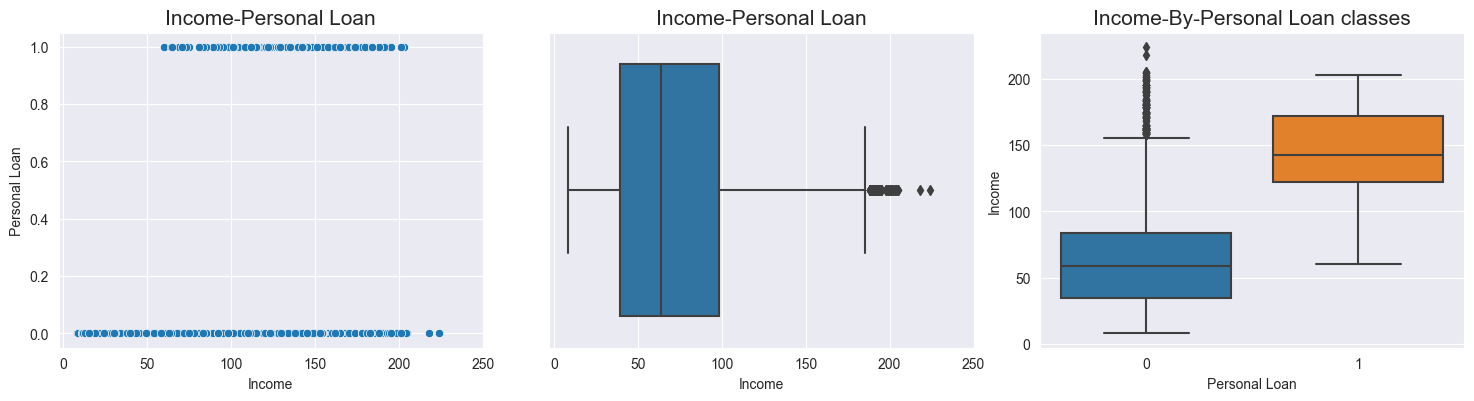

In [14]:
x='Income'
y='Personal Loan'
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))
fig.tight_layout(pad=2.0)

# ax1
sns.scatterplot(ax=ax1, x=x, y=y, data=data)
ax1.set_title(x+'-'+y, fontsize=15)
ax1.set(xticks=range(0, 300, 50))

#ax2
sns.boxplot(ax=ax2, x=x, data=data)
ax2.set_title(x+'-'+y, fontsize=15)
ax2.set(xticks=range(0, 300, 50))

# ax3
sns.boxplot(ax=ax3, x=y, y=x, data=data)
ax3.set_title(x+'-By-'+y+' classes', fontsize=15)

plt.show()

<div class="alert alert-success" role="alert">
    <p><b>There is no outlier.</b></p>
    <p><b>Income has Normal Distribution.</b></p>
    <p><b>Income is in [8, 224]</b></p>
</div>

<div class="alert alert-warning" role="alert">
    <p><b><span style="font-size:25px"> Col 5 : Zip Code</span></b></p>
</div>

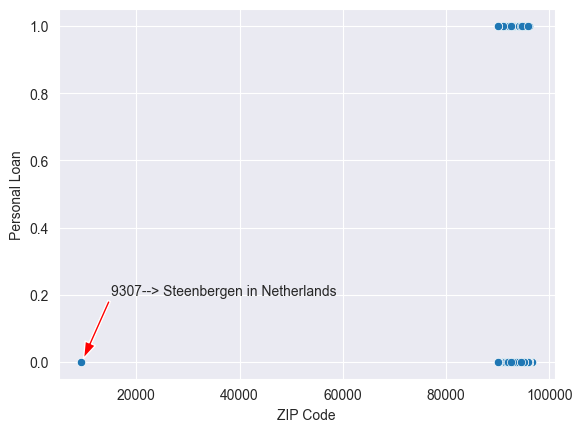

In [15]:
sns.scatterplot(x='ZIP Code', y='Personal Loan', data=data)
plt.annotate('9307--> Steenbergen in Netherlands', xy=(9750, 0.01), xytext=(15000, 0.2),
            arrowprops = dict(facecolor = 'red', width = 2, headwidth = 8),)
plt.show()

In [16]:
data[data['ZIP Code']<20000]

Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
384   51          25      21      9307       4    0.6          3         0   

     Personal Loan  Securities Account  CD Account  Online  CreditCard  
384              0                   0           0       1           1

In [17]:
# Remove row about ZIP Code 9307 ---> Netherland 
data = data[data['ZIP Code']>80000]

In [18]:
# Reset indexes to rearrange it
# data.reset_index(inplace=True)

<div class="alert alert-success" role="alert">
    <p><b>There is no outlier.</b></p>
    <p><b>All ZIP Codes are in USA.</b></p>
</div>

<div class="alert alert-warning" role="alert">
    <p><b><span style="font-size:25px"> Col 6 : Family</span></b></p>
</div>

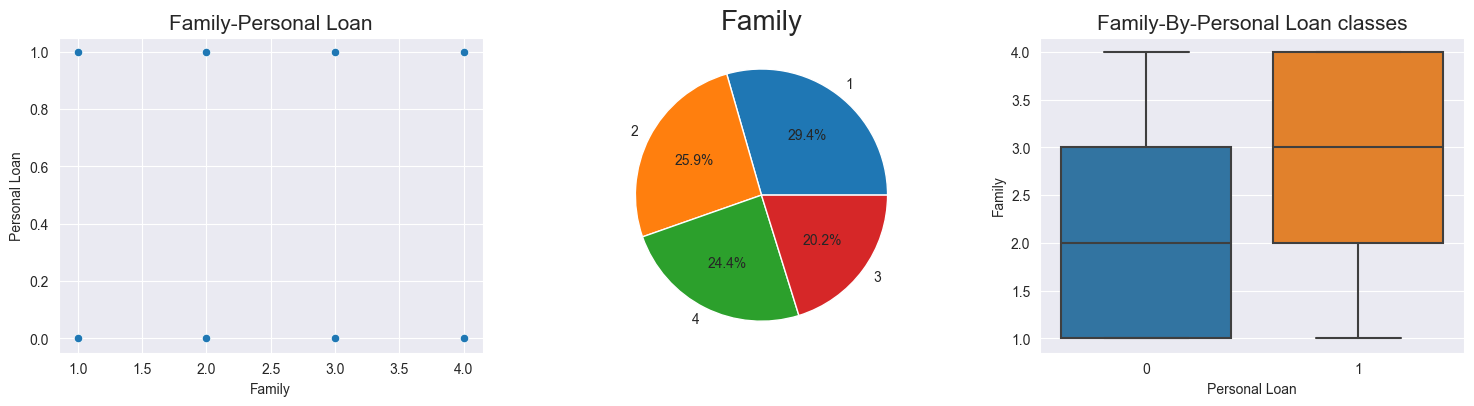

In [19]:
x='Family'
y='Personal Loan'
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))
fig.tight_layout(pad=2.0)

# ax1
sns.scatterplot(ax=ax1, x=x, y=y, data=data)
ax1.set_title(x+'-'+y, fontsize=15)
# ax1.set(xticks=range(0, 300, 50))

#ax2
pie_data = data[x].value_counts()
labels = pie_data.index
ax2.pie(x=pie_data, labels=labels, autopct='%1.1f%%')
ax2.set_title(x, fontsize=20)

# ax3
sns.boxplot(ax=ax3, x=y, y=x, data=data)
ax3.set_title(x+'-By-'+y+' classes', fontsize=15)

plt.show()

<div class="alert alert-success" role="alert">
    <p><b>There is no outlier.</b></p>
    <p><b>The frequency of all categories is almost equal. (20% - 30%).</b></p>
</div>

<div class="alert alert-warning" role="alert">
    <p><b><span style="font-size:25px"> Col 7 : CCAvg</span></b></p>
</div>

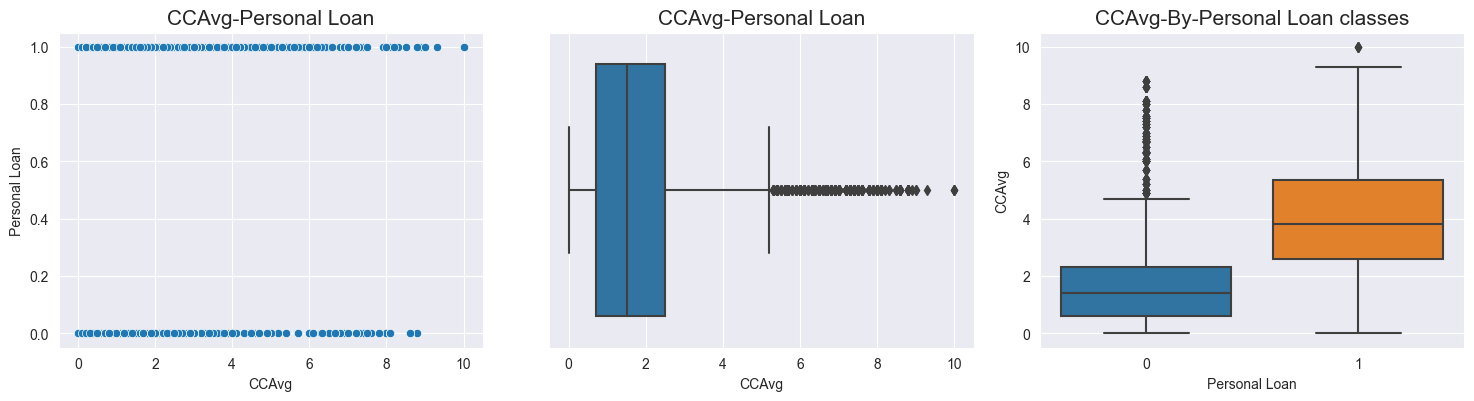

In [20]:
x='CCAvg'
y='Personal Loan'
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))
fig.tight_layout(pad=2.0)

# ax1
sns.scatterplot(ax=ax1, x=x, y=y, data=data)
ax1.set_title(x+'-'+y, fontsize=15)
# ax1.set(xticks=range(0, 300, 50))

#ax2
sns.boxplot(ax=ax2, x=x, data=data)
ax2.set_title(x+'-'+y, fontsize=15)
# ax2.set(xticks=range(0, 300, 50))

# ax3
sns.boxplot(ax=ax3, x=y, y=x, data=data)
ax3.set_title(x+'-By-'+y+' classes', fontsize=15)

plt.show()

<div class="alert alert-success" role="alert">
    <p><b>There is no outlier.</b></p>
    <p><b>The more CCAvg, the less cumolativity.</b></p>
    <p><b>The dispersion in the range of 9 to 10 is very thin.</b></p>    
</div>

<div class="alert alert-warning" role="alert">
    <p><b><span style="font-size:25px"> Col 8 : Education</span></b></p>
</div>

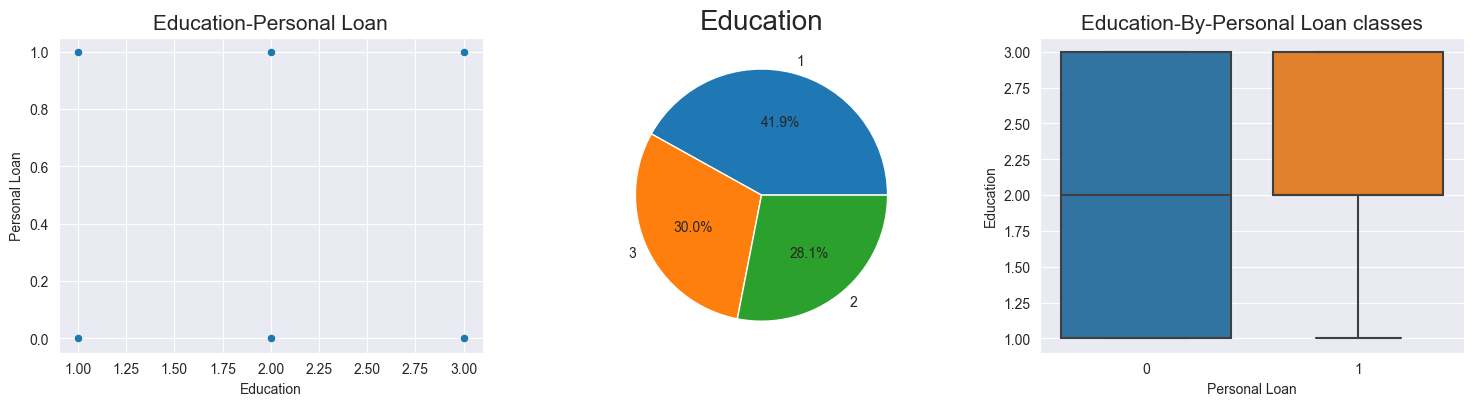

In [21]:
x='Education'
y='Personal Loan'
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))
fig.tight_layout(pad=2.0)

# ax1
sns.scatterplot(ax=ax1, x=x, y=y, data=data)
ax1.set_title(x+'-'+y, fontsize=15)
# ax1.set(xticks=range(0, 300, 50))

#ax2
pie_data = data[x].value_counts()
labels = pie_data.index
ax2.pie(x=pie_data, labels=labels, autopct='%1.1f%%')
ax2.set_title(x, fontsize=20)

# ax3
sns.boxplot(ax=ax3, x=y, y=x, data=data)
ax3.set_title(x+'-By-'+y+' classes', fontsize=15)

plt.show()

<div class="alert alert-success" role="alert">
    <p><b>There is no outlier.</b></p>
    <p><b>Most comulativity is in category 1=Undergrade.</b></p>  
</div>

<div class="alert alert-warning" role="alert">
    <p><b><span style="font-size:25px"> Col 9 : Mortgage</span></b></p>
</div>

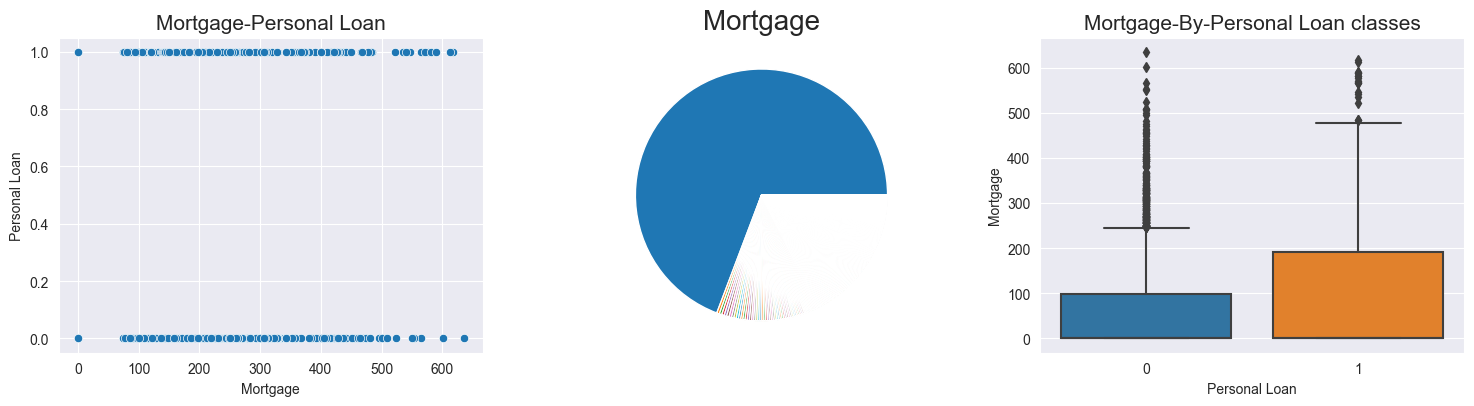

In [22]:
x='Mortgage'
y='Personal Loan'
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))
fig.tight_layout(pad=2.0)

# ax1
sns.scatterplot(ax=ax1, x=x, y=y, data=data)
ax1.set_title(x+'-'+y, fontsize=15)
# ax1.set(xticks=range(0, 300, 50))

#ax2
pie_data = data[x].value_counts()
labels = pie_data.index
ax2.pie(x=pie_data)
ax2.set_title(x, fontsize=20)

# ax3
sns.boxplot(ax=ax3, x=y, y=x, data=data)
ax3.set_title(x+'-By-'+y+' classes', fontsize=15)

plt.show()

<div class="alert alert-success" role="alert">
    <p><b>There is no outlier.</b></p>
    <p><b>About 69.2% of samples have mortgage=0.</b></p>
    <p><b>The dispersion in the values more than 250 is very thin.</b></p>
</div>

<div class="alert alert-warning" role="alert">
    <p><b><span style="font-size:25px"> Col 10 : Securities Account</span></b></p>
</div>

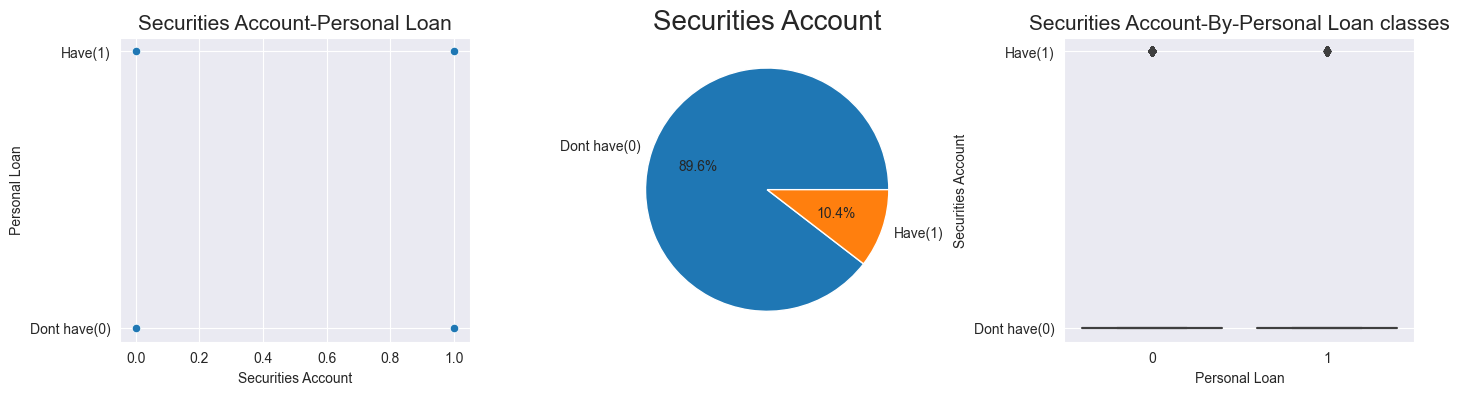

In [23]:
x='Securities Account'
y='Personal Loan'
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
fig.tight_layout(pad=6.0)

# ax1
sns.scatterplot(ax=ax1, x=x, y=y, data=data)
ax1.set_title(x+'-'+y, fontsize=15)
ax1.set(yticks=range(0, 2, 1), yticklabels=['Dont have(0)', 'Have(1)'])

#ax2
pie_data = data[x].value_counts()
labels = pie_data.index
ax2.pie(x=pie_data, labels=['Dont have(0)', 'Have(1)'], autopct='%1.1f%%')
ax2.set_title(x, fontsize=20)


# ax3
sns.boxplot(ax=ax3, x=y, y=x, data=data)
ax3.set_title(x+'-By-'+y+' classes', fontsize=15)
ax3.set(yticks=range(0, 2, 1), yticklabels=['Dont have(0)', 'Have(1)'])
plt.show()

<div class="alert alert-success" role="alert">
    <p><b>There is no outlier.</b></p>
    <p><b>About 89.6% of samples do not have Securities Account.</b></p>
</div>

<div class="alert alert-warning" role="alert">
    <p><b><span style="font-size:25px"> Col 11 : CD Account</span></b></p>
</div>

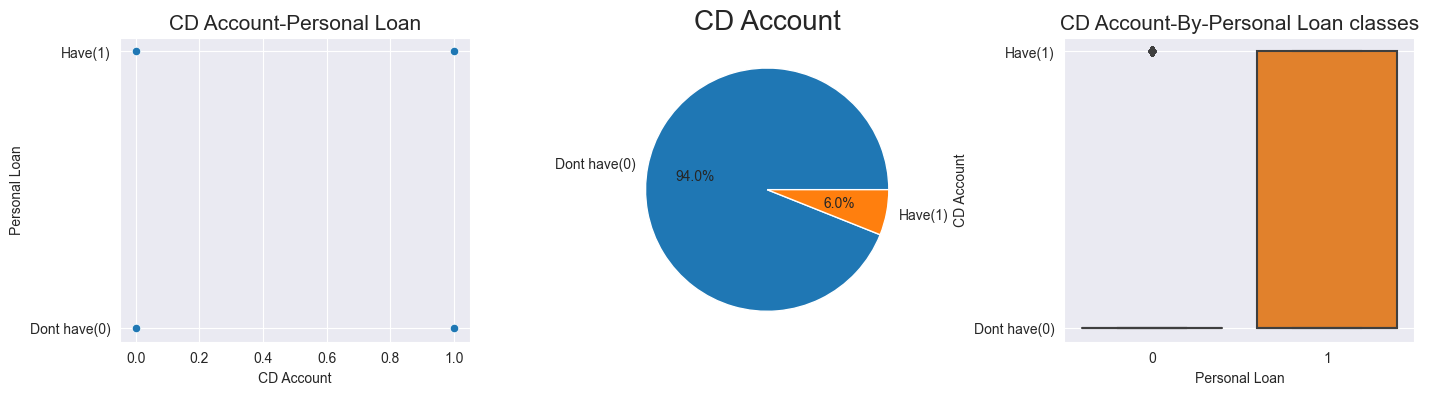

In [24]:
x='CD Account'
y='Personal Loan'
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
fig.tight_layout(pad=6.0)

# ax1
sns.scatterplot(ax=ax1, x=x, y=y, data=data)
ax1.set_title(x+'-'+y, fontsize=15)
ax1.set(yticks=range(0, 2, 1), yticklabels=['Dont have(0)', 'Have(1)'])

#ax2
pie_data = data[x].value_counts()
labels = pie_data.index
ax2.pie(x=pie_data, labels=['Dont have(0)', 'Have(1)'], autopct='%1.1f%%')
ax2.set_title(x, fontsize=20)


# ax3
sns.boxplot(ax=ax3, x=y, y=x, data=data)
ax3.set_title(x+'-By-'+y+' classes', fontsize=15)
ax3.set(yticks=range(0, 2, 1), yticklabels=['Dont have(0)', 'Have(1)'])
plt.show()

<div class="alert alert-success" role="alert">
    <p><b>There is no outlier.</b></p>
    <p><b>About 94% of samples do not have CD Account.</b></p>
</div>

<div class="alert alert-warning" role="alert">
    <p><b><span style="font-size:25px"> Col 12 : Online</span></b></p>
</div>

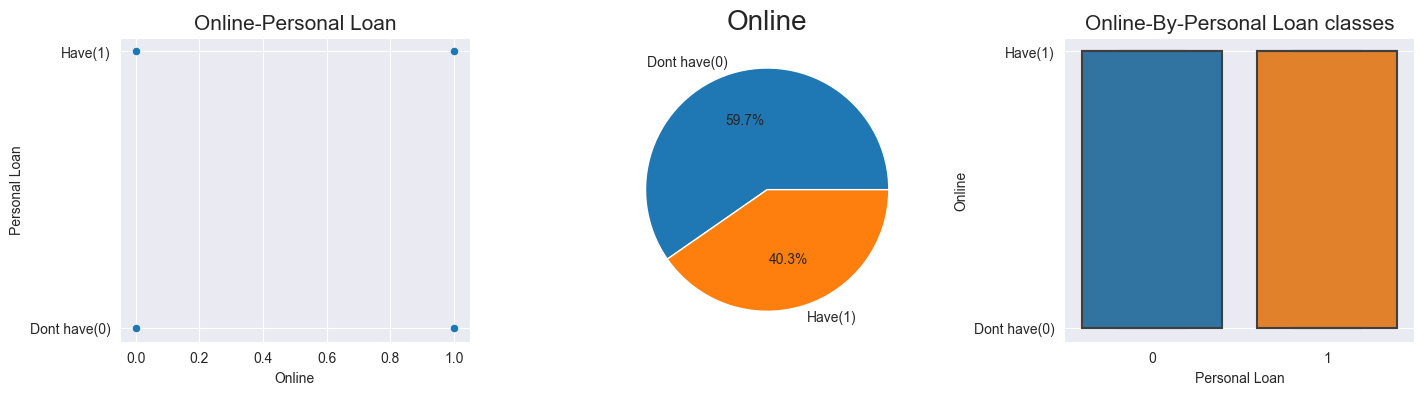

In [25]:
x='Online'
y='Personal Loan'
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
fig.tight_layout(pad=6.0)

# ax1
sns.scatterplot(ax=ax1, x=x, y=y, data=data)
ax1.set_title(x+'-'+y, fontsize=15)
ax1.set(yticks=range(0, 2, 1), yticklabels=['Dont have(0)', 'Have(1)'])

#ax2
pie_data = data[x].value_counts()
labels = pie_data.index
ax2.pie(x=pie_data, labels=['Dont have(0)', 'Have(1)'], autopct='%1.1f%%')
ax2.set_title(x, fontsize=20)


# ax3
sns.boxplot(ax=ax3, x=y, y=x, data=data)
ax3.set_title(x+'-By-'+y+' classes', fontsize=15)
ax3.set(yticks=range(0, 2, 1), yticklabels=['Dont have(0)', 'Have(1)'])
plt.show()

<div class="alert alert-success" role="alert">
    <p><b>There is no outlier.</b></p>
    <p><b>About 59.7% of samples do not use internet banking.</b></p>
    <p><b>About 40.3% of samples use internet banking.</b></p>
</div>

<div class="alert alert-warning" role="alert">
    <p><b><span style="font-size:25px"> Col 13 : CreditCard</span></b></p>
</div>

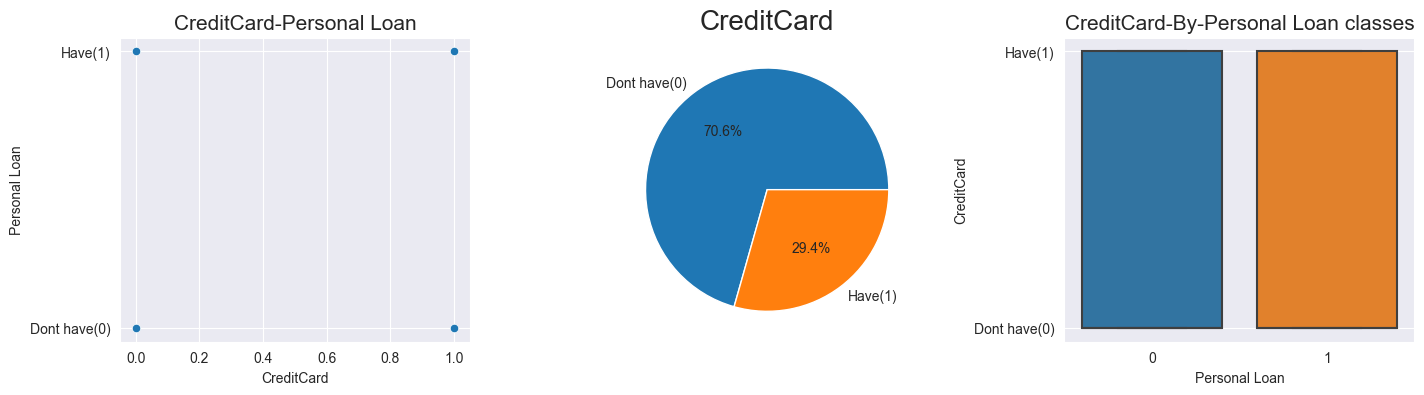

In [26]:
x='CreditCard'
y='Personal Loan'
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
fig.tight_layout(pad=6.0)

# ax1
sns.scatterplot(ax=ax1, x=x, y=y, data=data)
ax1.set_title(x+'-'+y, fontsize=15)
ax1.set(yticks=range(0, 2, 1), yticklabels=['Dont have(0)', 'Have(1)'])

#ax2
pie_data = data[x].value_counts()
labels = pie_data.index
ax2.pie(x=pie_data, labels=['Dont have(0)', 'Have(1)'], autopct='%1.1f%%')
ax2.set_title(x, fontsize=20)


# ax3
sns.boxplot(ax=ax3, x=y, y=x, data=data)
ax3.set_title(x+'-By-'+y+' classes', fontsize=15)
ax3.set(yticks=range(0, 2, 1), yticklabels=['Dont have(0)', 'Have(1)'])
plt.show()

<div class="alert alert-success" role="alert">
    <p><b>There is no outlier.</b></p>
    <p><b>About 70.6% of samples do not use internet banking.</b></p>
    <p><b>About 29.4% of samples use internet banking.</b></p>
</div>

<div class="alert alert-warning" role="alert">
    <p><b><span style="font-size:25px"> Target : Personal Loan</span></b></p>
</div>

Text(0.5, 1.0, 'Personal Loan')

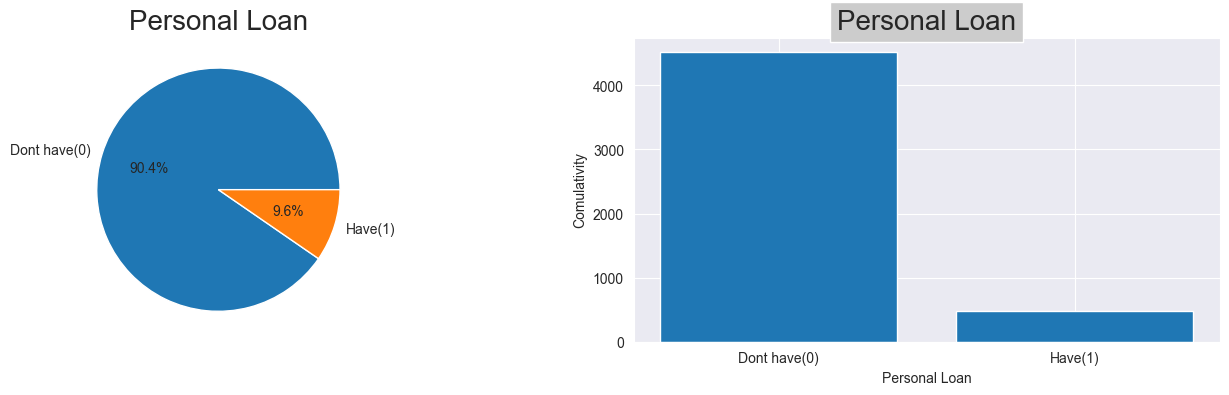

In [27]:
x='Personal Loan'

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
fig.tight_layout(pad=6.0)

# ax1
pie_data = data[x].value_counts()
labels = pie_data.index
ax1.pie(x=pie_data, labels=['Dont have(0)', 'Have(1)'], autopct='%1.1f%%')
ax1.set_title(x, fontsize=20)

ax2.bar(pie_data.index, pie_data, align='center')
ax2.set_xticks(pie_data.index)
ax2.set_xlabel("Personal Loan")
ax2.set_ylabel("Comulativity")
ax2.set_xticklabels(['Dont have(0)', 'Have(1)'])
ax2.set_title("Personal Loan", fontsize=20, bbox={'facecolor':'0.8', 'pad':5})

In [28]:
data['Personal Loan'].value_counts()

Personal Loan
0    4519
1     480
Name: count, dtype: int64

<div class="alert alert-success" role="alert">
    <p><b>There is no outlier.</b></p>
    <p><b>About 90.4% of samples do not accepted to recive loan.</b></p>
    <p><b>About 9.6% of samples accepted to recive loan.</b></p>
</div>

<a id="plots"></a>
# <b><span style="color:#0266b7">Step 3.4 | </span><span style="color:#ff6200">Handle ZIP Code</span></b>

In [29]:
# Number of Unique values of zip code
data['ZIP Code'].nunique()

466

In [30]:
list_zipcode = list(data['ZIP Code'])

In [31]:
County = []
Lat = []
Long = []

for x in list_zipcode :
    my_city_county = zcode.matching(str(x))
    if len(my_city_county) == 1 : # There is information about zipcode
        county = my_city_county[0].get('county')
        lat = my_city_county[0].get('lat')
        long = my_city_county[0].get('long')
    else :
        county = 'NotFound'
        lat = np.NaN
        long = np.NaN
    County.append(county)
    Lat.append(float(lat))
    Long.append(float(long))

In [32]:
# Add County, Lat, Long to DataFrame
data['Location'] = County
data['Lat'] = Lat
data['Long'] = Long

In [33]:
data.isna().sum()

Age                    0
Experience             0
Income                 0
ZIP Code               0
Family                 0
CCAvg                  0
Education              0
Mortgage               0
Personal Loan          0
Securities Account     0
CD Account             0
Online                 0
CreditCard             0
Location               0
Lat                   33
Long                  33
dtype: int64

In [34]:
data[data.Location=='NotFound']['ZIP Code'].value_counts()

ZIP Code
92717    22
96651     6
92634     5
Name: count, dtype: int64

In [35]:
# 92717
z = list(data[data['ZIP Code']==92717].index)

# for x in z :
#     data.Location.loc[x]='Irvine'
#     data.Lat.loc[x] = 33.6462
#     data.Long.loc[x] = -117.8398

for x in z :
    data.at[x, 'Location']='Irvine'
    data.at[x, 'Lat'] = 33.6462
    data.at[x, 'Long'] = -117.8398

In [36]:
# 92634     
z = list(data[data['ZIP Code']==92634].index)

for x in z :
    data.at[x, 'Location']='Fullerton'
    data.at[x, 'Lat'] = 33.8739
    data.at[x, 'Long'] = -117.9028

In [37]:
# 96651
# its not in US
z = list(data[data['ZIP Code']==96651].index)

for x in z :
    data.drop(index=x, inplace=True)

In [38]:
data.isna().sum()

Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
Location              0
Lat                   0
Long                  0
dtype: int64

In [39]:
data.dtypes

Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
Location               object
Lat                   float64
Long                  float64
dtype: object

In [40]:
len(data)

4993

In [41]:
# define the world map centered around Canada with a low zoom level
map = folium.Map(location=[38, -120], zoom_start=6)


# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()


for lat, lng, flag in zip(data.Lat, data.Long, data['Personal Loan']):
    if flag==0:    
        incidents.add_child(
            folium.vector_layers.CircleMarker(
                [lat, lng],
                radius=1, # define how big you want the circle markers to be
                color='red',
                fill=True,
                fill_color='red',
                fill_opacity=0.6
            )
        )
    else:
        incidents.add_child(
            folium.vector_layers.CircleMarker(
                [lat, lng],
                radius=5, # define how big you want the circle markers to be
                color='green',
                fill=True,
                fill_color='green',
                fill_opacity=1
            )
        )

    
# add incidents to map
map.add_child(incidents)

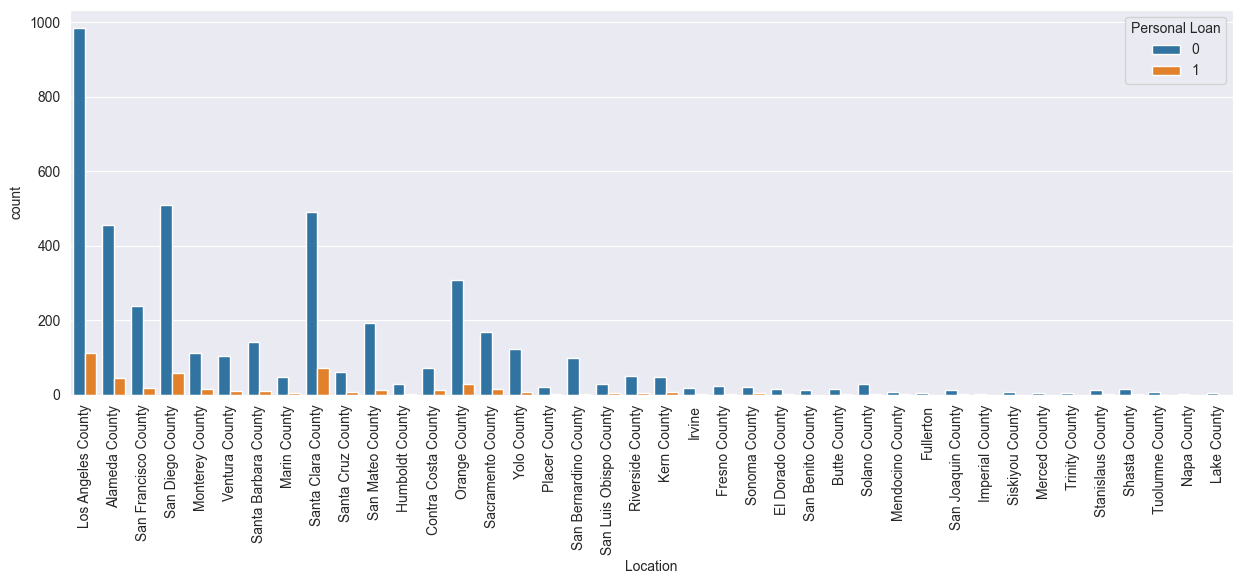

In [42]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.countplot(data=data, x='Location', hue='Personal Loan')
ax.tick_params(axis='x', rotation=90)

<div class="alert alert-success" role="alert">
    <p><b>Most of persons are from Los Angeles.</b></p>
    <p><b>Next places are for San Diego, Santa Carla and Alameda</b></p>
</div>

<a id="normalization"></a>
# <b><span style="color:#0266b7">Step 3.5 | </span><span style="color:#ff6200">Normalization</span></b>

In [43]:
# Create a copy of data
main_df = data[:]

In [44]:
# data = main_df[:]
data

Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0      25           1      49     91107       4    1.6          1         0   
1      45          19      34     90089       3    1.5          1         0   
2      39          15      11     94720       1    1.0          1         0   
3      35           9     100     94112       1    2.7          2         0   
4      35           8      45     91330       4    1.0          2         0   
...   ...         ...     ...       ...     ...    ...        ...       ...   
4995   29           3      40     92697       1    1.9          3         0   
4996   30           4      15     92037       4    0.4          1        85   
4997   63          39      24     93023       2    0.3          3         0   
4998   65          40      49     90034       3    0.5          2         0   
4999   28           4      83     92612       3    0.8          1         0   

      Personal Loan  Securities Account  CD Account  Online  CreditCard  \
0                 0                   1           0       0           0   
1                 0                   1           0       0           0   
2                 0                   0           0       0           0   
3                 0                   0           0       0           0   
4                 0                   0           0       0           1   
...             ...                 ...         ...     ...         ...   
4995              0                   0           0       1           0   
4996              0                   0           0       1           0   
4997              0                   0           0       0           0   
4998              0                   0           0       1           0   
4999              0                   0           0       1           1   

                  Location      Lat      Long  
0       Los Angeles County  34.1620 -118.0894  
1       Los Angeles County  34.0218 -118.2883  
2           Alameda County  37.8746 -122.2547  
3     San Francisco County  37.7217 -122.4446  
4       Los Angeles County  34.2429 -118.5273  
...                    ...      ...       ...  
4995         Orange County  33.6473 -117.8409  
4996      San Diego County  32.8668 -117.2482  
4997        Ventura County  34.5210 -119.2477  
4998    Los Angeles County  34.0293 -118.3994  
4999         Orange County  33.6615 -117.8217  

[4993 rows x 16 columns]

In [45]:
ZipCode = data['ZIP Code']
Location = data['Location']
Target = data['Personal Loan'].values.reshape(-1, 1)

data.drop(columns=['ZIP Code','Location','Personal Loan'], inplace=True)

In [46]:
columns = data.columns

In [47]:
scaler = MinMaxScaler(feature_range=(0, 1))
normalized = scaler.fit_transform(data)
df = pd.DataFrame(normalized, columns=columns)
df.describe()

Age   Experience       Income       Family        CCAvg  \
count  4993.000000  4993.000000  4993.000000  4993.000000  4993.000000   
mean      0.507838     0.468391     0.304800     0.465385     0.193973   
std       0.260483     0.265428     0.213114     0.382534     0.174817   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.272727     0.232558     0.143519     0.000000     0.070000   
50%       0.500000     0.465116     0.259259     0.333333     0.150000   
75%       0.727273     0.697674     0.416667     0.666667     0.250000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

         Education     Mortgage  Securities Account   CD Account       Online  \
count  4993.000000  4993.000000         4993.000000  4993.000000  4993.000000   
mean      0.440216     0.089026            0.104546     0.060485     0.596836   
std       0.419837     0.160256            0.305999     0.238407     0.490582   
min       0.000000     0.000000            0.000000     0.000000     0.000000   
25%       0.000000     0.000000            0.000000     0.000000     0.000000   
50%       0.500000     0.000000            0.000000     0.000000     1.000000   
75%       1.000000     0.159055            0.000000     0.000000     1.000000   
max       1.000000     1.000000            1.000000     1.000000     1.000000   

        CreditCard          Lat         Long  
count  4993.000000  4993.000000  4993.000000  
mean      0.293811     0.350496     0.480981  
std       0.455552     0.228029     0.247176  
min       0.000000     0.000000     0.000000  
25%       0.000000     0.157048     0.230360  
50%       0.000000     0.298451     0.502060  
75%       1.000000     0.564308     0.710931  
max       1.000000     1.000000     1.000000

In [48]:
# add Target to DataFrame
df.insert(13, 'Personal_Loan', Target)

In [49]:
df.describe()

Age   Experience       Income       Family        CCAvg  \
count  4993.000000  4993.000000  4993.000000  4993.000000  4993.000000   
mean      0.507838     0.468391     0.304800     0.465385     0.193973   
std       0.260483     0.265428     0.213114     0.382534     0.174817   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.272727     0.232558     0.143519     0.000000     0.070000   
50%       0.500000     0.465116     0.259259     0.333333     0.150000   
75%       0.727273     0.697674     0.416667     0.666667     0.250000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

         Education     Mortgage  Securities Account   CD Account       Online  \
count  4993.000000  4993.000000         4993.000000  4993.000000  4993.000000   
mean      0.440216     0.089026            0.104546     0.060485     0.596836   
std       0.419837     0.160256            0.305999     0.238407     0.490582   
min       0.000000     0.000000            0.000000     0.000000     0.000000   
25%       0.000000     0.000000            0.000000     0.000000     0.000000   
50%       0.500000     0.000000            0.000000     0.000000     1.000000   
75%       1.000000     0.159055            0.000000     0.000000     1.000000   
max       1.000000     1.000000            1.000000     1.000000     1.000000   

        CreditCard          Lat         Long  Personal_Loan  
count  4993.000000  4993.000000  4993.000000    4993.000000  
mean      0.293811     0.350496     0.480981       0.096135  
std       0.455552     0.228029     0.247176       0.294805  
min       0.000000     0.000000     0.000000       0.000000  
25%       0.000000     0.157048     0.230360       0.000000  
50%       0.000000     0.298451     0.502060       0.000000  
75%       1.000000     0.564308     0.710931       0.000000  
max       1.000000     1.000000     1.000000       1.000000

<a id="modeling"></a>
# <p style="padding:15px;background-color:#0266b7 ;margin:0;color:#ffffff;font-family:Chalkduster;font-size:100%;text-align:center;border-radius: 25px 75px;overflow:hidden;font-weight:500">Step 4 |  Modeling</p>

<a id="prerequisites"></a>
# <b><span style="color:#0266b7">Step 4.1 | </span><span style="color:#ff6200">Prerequisites</span></b>

In [50]:
df

Age  Experience    Income    Family  CCAvg  Education  Mortgage  \
0     0.045455    0.023256  0.189815  1.000000   0.16        0.0  0.000000   
1     0.500000    0.441860  0.120370  0.666667   0.15        0.0  0.000000   
2     0.363636    0.348837  0.013889  0.000000   0.10        0.0  0.000000   
3     0.272727    0.209302  0.425926  0.000000   0.27        0.5  0.000000   
4     0.272727    0.186047  0.171296  1.000000   0.10        0.5  0.000000   
...        ...         ...       ...       ...    ...        ...       ...   
4988  0.136364    0.069767  0.148148  0.000000   0.19        1.0  0.000000   
4989  0.159091    0.093023  0.032407  1.000000   0.04        0.0  0.133858   
4990  0.909091    0.906977  0.074074  0.333333   0.03        1.0  0.000000   
4991  0.954545    0.930233  0.189815  0.666667   0.05        0.5  0.000000   
4992  0.113636    0.093023  0.347222  0.666667   0.08        0.0  0.000000   

      Securities Account  CD Account  Online  CreditCard       Lat      Long  \
0                    1.0         0.0     0.0         0.0  0.174627  0.709655   
1                    1.0         0.0     0.0         0.0  0.159395  0.686169   
2                    0.0         0.0     0.0         0.0  0.577986  0.217820   
3                    0.0         0.0     0.0         0.0  0.561374  0.195397   
4                    0.0         0.0     0.0         1.0  0.183416  0.657948   
...                  ...         ...     ...         ...       ...       ...   
4988                 0.0         0.0     1.0         0.0  0.118707  0.738998   
4989                 0.0         0.0     1.0         0.0  0.033908  0.808983   
4990                 0.0         0.0     0.0         0.0  0.213631  0.572884   
4991                 0.0         0.0     1.0         0.0  0.160209  0.673051   
4992                 0.0         0.0     1.0         1.0  0.120249  0.741265   

      Personal_Loan  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  
...             ...  
4988              0  
4989              0  
4990              0  
4991              0  
4992              0  

[4993 rows x 14 columns]

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4993 entries, 0 to 4992
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 4993 non-null   float64
 1   Experience          4993 non-null   float64
 2   Income              4993 non-null   float64
 3   Family              4993 non-null   float64
 4   CCAvg               4993 non-null   float64
 5   Education           4993 non-null   float64
 6   Mortgage            4993 non-null   float64
 7   Securities Account  4993 non-null   float64
 8   CD Account          4993 non-null   float64
 9   Online              4993 non-null   float64
 10  CreditCard          4993 non-null   float64
 11  Lat                 4993 non-null   float64
 12  Long                4993 non-null   float64
 13  Personal_Loan       4993 non-null   int64  
dtypes: float64(13), int64(1)
memory usage: 546.2 KB


In [52]:
# Deifne a function to create X, y
def Xy(DataFrame) :
    global X, y
    X = DataFrame.drop(columns='Personal_Loan')
    y = DataFrame['Personal_Loan'].values.reshape(-1, 1)

In [53]:
# Define a Function to split X, y to train and test sets
def split(X, y, test_size=0.2, random_state=0) :
    global X_train, X_test, y_train, y_test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

In [54]:
#  Define a Function to evaluate model
def eval(y_real, y_hat) :
    global r2score
    r2score = metrics.r2_score(y_real, y_hat)
    print('Mean Absolut Error : {:.4f}'.format(metrics.mean_absolute_error(y_real, y_hat)))
    print('Mean Square Error : {:.4f}'.format(metrics.mean_squared_error(y_real, y_hat)))
    print('R2Score : {:.4f}'.format(r2score))

In [55]:
df.isna().sum()

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
Lat                   0
Long                  0
Personal_Loan         0
dtype: int64

<a id="knn"></a>
# <b><span style="color:#0266b7">Step 4.2 | </span><span style="color:#ff6200">KNN</span></b>

In [56]:
Xy(df)
split(X, y)

In [57]:
# find best k for knn :
best_score = 0
best_k = 0

for k in range(3, 16, 2) :
    knn = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    y_hat = knn.predict(X_test)
    score = metrics.accuracy_score(y_test, y_hat)
    if score > best_score :
        best_score = score
        best_k = k
print('Best k={}, best_score={:.4f}'.format(best_k, best_score))

Best k=3, best_score=0.9479


In [58]:
knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc_knn = metrics.accuracy_score(y_test, y_pred)
print(acc_knn)

0.9479479479479479


<a id="eval"></a>
# <b><span style="color:#0266b7">Step 4.3 | </span><span style="color:#ff6200">Evaluations</span></b>

In [59]:
corelation_matrix = df.corr()
corelation_matrix.style.background_gradient(cmap='coolwarm', axis=None).format(precision=2)

In [60]:
confusion_matrix(y_test, y_hat)

array([[905,   3],
       [ 60,  31]], dtype=int64)

In [61]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       908
           1       0.91      0.34      0.50        91

    accuracy                           0.94       999
   macro avg       0.92      0.67      0.73       999
weighted avg       0.94      0.94      0.92       999



<a id="contents_tabel"></a>    
<div style="border-radius:10px; padding: 15px; background-color: #d4f1f4; font-size:130%; text-align:left">

<h4 align="left"><font color=#ff6200>Author: Nima Pourmoradi</font></h4>
<h6 align="left"><font color=#ff6200><a href='https://github.com/NimaPourmoradi'>github: https://github.com/NimaPourmoradi</font></h6>
<h6 align="left"><font color=#ff6200><a href='https://www.kaggle.com/nimapourmoradi'>kaggle : https://www.kaggle.com/nimapourmoradi</a></font></h6>
<h6 align="left"><font color=#ff6200><a href='https://www.linkedin.com/in/nima-pourmoradi-081949288/'>linkedin : www.linkedin.com/in/nima-pourmoradi-081949288</a></font></h6>